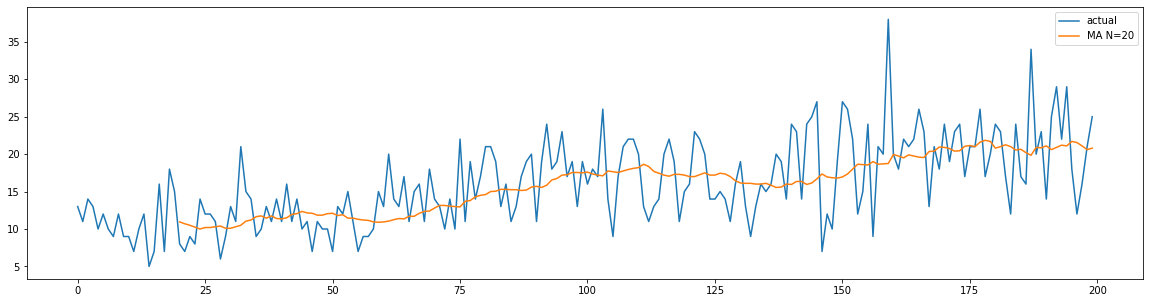

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#if the header is not equal to 'none' the values from the data will
#become the headers
def load_data(file): 
    return pd.read_csv(file, sep = ",", header = None)

#upload data
data = load_data("sopranos1.csv")

#this changes the original data from a dataframe to a numpy array
data = data.values.flatten()

#define function for a single moving average prediction based on N and the 
#period we want to predict
#data is the infomation, t=is the time and N= the number of periods which we 
#are uing to predict
def MA(data,t, N):
  return np.average(data[t-N:t])

#Here we are getting the predicted value for the 9th period using the previous
#5 period values
MA(data,204,45)

#define function to forecast all possible periods given a value N, using
#previously defined function

#N=5 period 5 to end(39)
#N=10 period 10 to end(39)
#N=39 period 39 to end(39)

#index is the range of numbers 
def calc_MA_vec(N, data):
  vec_pred=np.zeros(len(data)-N)
  for t in range(N,len(data)):
    vec_pred[t-N]=MA(data,t,N)
  return vec_pred

calc_MA_vec(45,data)
#forecast all possible periods after N, for N = 50 and N = 2

#MA_pred_N50= calc_MA_vec(50,data)
#MA_pred_N2= calc_MA_vec(2,data)
MA_pred_N20= calc_MA_vec(20,data)


#plot forecasts vs actual data

fig,fig_ax=plt.subplots(figsize=(20,5))
fig_ax.plot(range(0,len(data)),data)
#fig_ax.plot(range(50,len(data)), MA_pred_N50)
#fig_ax.plot(range(2,len(data)), MA_pred_N2)
fig_ax.plot(range(20,len(data)), MA_pred_N20)
#Create a legend
#fig_ax.legend(["actual","MA N=50", "MA N=2"])
fig_ax.legend(["actual","MA N=20"])

#In this code we are using moving averages to make short-term predictions
#that are based on the previous 20 periods

#This forecasting information is not very accuarate but can be used to determine 
#marketing strategy for different parts of the year 